In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="1" #model will be trained on GPU 1

In [2]:
import tensorflow.keras
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import gzip
%matplotlib inline
from tensorflow.keras.layers import Input,Conv2D,MaxPooling2D,UpSampling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import Constant, RandomNormal
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
file = '../data/Hz31.txt'
data = pd.read_csv(file, names=['z', 'hz', 'err'], sep = " " )
data.describe()

,z,hz,err
count,31.000000,31.000000,31.000000
mean,0.661219,105.922581,21.303226
std,0.520398,38.413424,14.587768
min,0.070000,68.600000,4.000000
25%,0.275000,78.950000,12.000000
50%,0.470000,90.000000,17.000000
75%,0.890000,121.000000,27.900000
max,1.965000,202.000000,62.000000


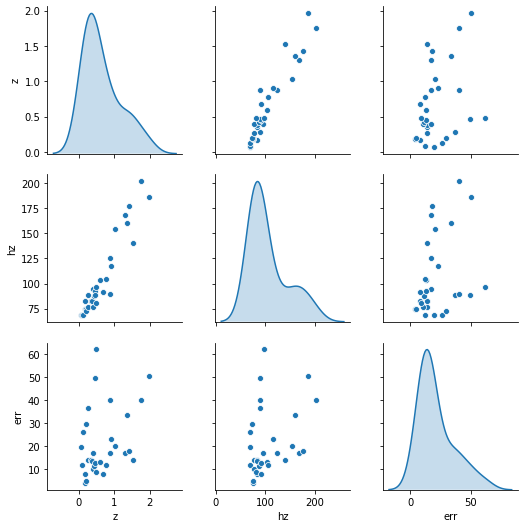

In [4]:
sns.pairplot(data, diag_kind="kde")
plt.savefig("DistHD.png")

In [5]:
# a = np.array([25,  3,  9,  7, 19,  2, 17, 16,  6, 28, 12, 20, 21, 26, 27, 11,  1,
#        10, 30, 13, 29,  0,  8, 18, 24,  5, 23,  4, 22, 15, 14])
# randomize = np.random.permutation(len(data.values))
shuffle = [x for x in range(len(data.values)) if x%2 ==0]
comp = [x for x in range(len(data.values)) if x%2 ==1]
shuffle.extend(comp)

data = data.values[shuffle]
# shuffle

In [6]:
# def norm(x):
#     return (x - train_stats['mean']) / train_stats['std']
# normed_train_data = norm(train_dataset)
# normed_test_data = norm(test_dataset)


Read the data for cosmic chronometers

In [7]:

# odds = [x for x in range(len(data)) if x%2 ==0]
# even = [x for x in range(len(data)) if x%2 ==1]
# new_order = np.array(even+odds)
# new_order = np.array([x for x in range(len(data)-1, 0, -1)])
# data = data.values[new_order]
# data = data.values


In [8]:
z = data[:,0]
y = data[:,1:]
# print(randomize)

In [9]:
scalerz = StandardScaler()
# scalerz = MinMaxScaler(feature_range=(-1,1))
# fit scaler on data
scalerz.fit(z.reshape(-1,1))
# apply transform
z = scalerz.transform(z.reshape(-1,1))

# scalery = MinMaxScaler(feature_range=(0,1))
# scalery = StandardScaler()
# scalery.fit(y)
# y = scalery.transform(y)

In [10]:
split = 0.8
ntrain = int(split * len(z))
indx = [ntrain]
z_train, z_test = np.split(z, indx)
y_train, y_test = np.split(y, indx)

In [11]:
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min',
                                   min_delta=0.0,
                                   patience=50.0,
                                   restore_best_weights=True)]
#                      tf.keras.callbacks.ReduceLROnPlateau(patience=2)]
# initializer = Constant(value=0.01)
# initializer = RandomNormal()
#     efirst = Dense(150, activation='relu', input_shape=(1,))(input_z)
#     ehidden = Dense(50, activation='relu')(efirst)
# #     ehidden = Dense(150, activation='relu')(efirst)
#     ehidden2 = Dense(150, activation='relu')(ehidden)
#     ehidden2 = Dense(150, activation='relu')(ehidden2)
#     elast = Dense(2, activation='relu')(ehidden2)



In [12]:
def model(input_z):
    efirst = Dense(50, activation='relu', input_shape=(1,))(input_z)
    ehidden = Dense(200, activation='relu')(efirst)
    ehidden2 = Dense(150, activation='relu')(ehidden)
    elast = Dense(2, activation='linear')(ehidden2)


    return elast


input_z = Input(shape = (1,))
neural_model = Model(input_z, model(input_z))
neural_model.compile(loss='mean_squared_error', optimizer = "adam")
neural_model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense (Dense)                (None, 50)                100       
_________________________________________________________________
dense_1 (Dense)              (None, 200)               10200     
_________________________________________________________________
dense_2 (Dense)              (None, 150)               30150     
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 302       
Total params: 40,752
Trainable params: 40,752
Non-trainable params: 0
_________________________________________________________________


In [13]:
# batch_size = 4
batch_size = 4
epochs = 100
input_z = Input(shape = (1,))

In [14]:
# autoencoder = Model(input_z, autoencoder(input_z))
# autoencoder.compile(loss='mean_squared_error', optimizer = "adam")
# autoencoder.summary()

In [15]:
model_train = neural_model.fit(z_train, y_train, batch_size=batch_size,
                                    epochs=epochs,verbose=1,
                                    validation_data=(z_test, y_test))
#                                     callbacks=callbacks)

Epoch 1/100
6/6 [==============================] - 0s 16ms/step - loss: 5363.3481 - val_loss: 10973.8574
Epoch 2/100
6/6 [==============================] - 0s 3ms/step - loss: 5322.9648 - val_loss: 10909.3750
Epoch 3/100
6/6 [==============================] - 0s 3ms/step - loss: 5267.9429 - val_loss: 10818.5137
Epoch 4/100
6/6 [==============================] - 0s 3ms/step - loss: 5196.1479 - val_loss: 10672.6064
Epoch 5/100
6/6 [==============================] - 0s 3ms/step - loss: 5071.5688 - val_loss: 10456.7793
Epoch 6/100
6/6 [==============================] - 0s 3ms/step - loss: 4882.8496 - val_loss: 10125.3428
Epoch 7/100
6/6 [==============================] - 0s 3ms/step - loss: 4580.4116 - val_loss: 9651.2012
Epoch 8/100
6/6 [==============================] - 0s 3ms/step - loss: 4174.9355 - val_loss: 8964.9854
Epoch 9/100
6/6 [==============================] - 0s 2ms/step - loss: 3616.9180 - val_loss: 8037.1274
Epoch 10/100
6/6 [==============================] - 0s 2ms/step - 

6/6 [==============================] - 0s 2ms/step - loss: 123.7841 - val_loss: 340.8238
Epoch 82/100
6/6 [==============================] - 0s 3ms/step - loss: 124.9311 - val_loss: 359.5460
Epoch 83/100
6/6 [==============================] - 0s 2ms/step - loss: 123.9038 - val_loss: 359.2282
Epoch 84/100
6/6 [==============================] - 0s 3ms/step - loss: 123.5512 - val_loss: 361.6191
Epoch 85/100
6/6 [==============================] - 0s 3ms/step - loss: 123.6421 - val_loss: 332.0309
Epoch 86/100
6/6 [==============================] - 0s 3ms/step - loss: 123.1797 - val_loss: 335.0490
Epoch 87/100
6/6 [==============================] - 0s 4ms/step - loss: 123.4169 - val_loss: 369.1255
Epoch 88/100
6/6 [==============================] - 0s 4ms/step - loss: 122.5840 - val_loss: 372.3090
Epoch 89/100
6/6 [==============================] - 0s 3ms/step - loss: 122.2828 - val_loss: 362.8313
Epoch 90/100
6/6 [==============================] - 0s 3ms/step - loss: 121.8135 - val_loss: 34

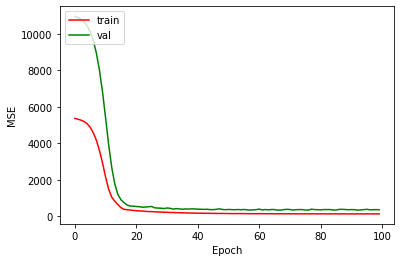

In [16]:
plt.plot(model_train.history['loss'], color='r', )
plt.plot(model_train.history['val_loss'], color='g')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig("loss_hz.png", dpi=200)


In [47]:
neural_model.save('FFNN_Hz.h5')

In [17]:
#uncer net
unet = np.sqrt(np.min(model_train.history['val_loss']))
print(np.min(model_train.history['loss']), np.min(model_train.history['val_loss']))
print(model_train.history['loss'][-1], model_train.history['val_loss'][-1])
# 119.81427764892578 311.0423889160156 120 epochs
# 120.7300033569336 355.0390930175781

120.56319427490234 326.3076171875
122.15547943115234 348.41217041015625


In [18]:
pred = neural_model.predict(z_test)
pred

array([[ 89.51797 ,  18.611622],
       [101.58311 ,  21.089468],
       [113.397865,  23.508217],
       [114.95496 ,  23.822893],
       [142.18678 ,  29.348484],
       [151.06494 ,  31.150745],
       [173.51297 ,  35.715572]], dtype=float32)

In [19]:
#zor and yor are the original velues for z and [Hz, err]
zor = scalerz.inverse_transform(z.reshape(-1,1))
# yor = scalery.inverse_transform(y)

In [20]:
# ranz = np.random.uniform(0, 2, size=10000)
ranz = np.linspace(0, 2, 1000)
r = scalerz.transform(ranz.reshape(-1, 1))
pred_random = neural_model.predict(r)
rr = scalerz.inverse_transform(r.reshape(-1,1))
# predy = scalery.inverse_transform(pred_random)


(0.0, 2.0)

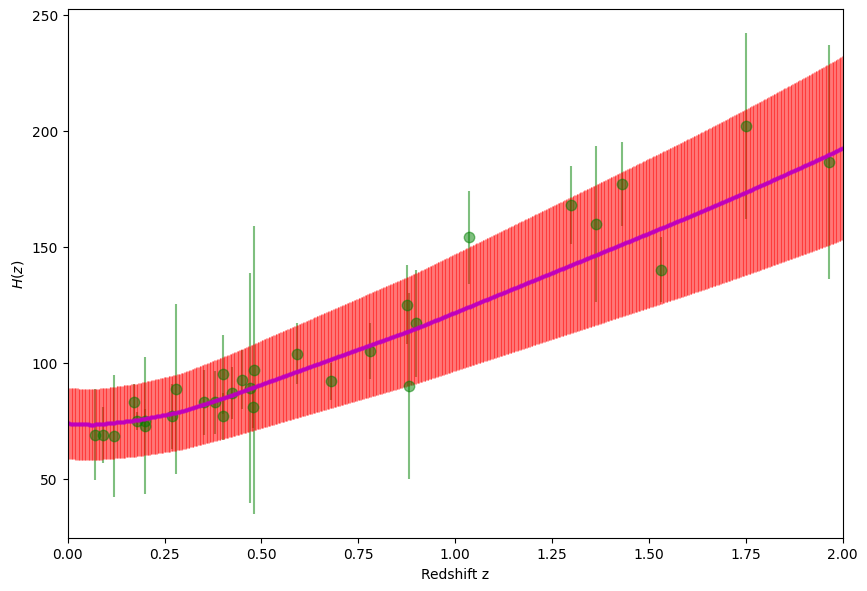

In [21]:
# plt.errorbar(zor, yor[:,0], yor[:,1], fmt='g.', markersize=15, label='Observations', alpha=0.5)
# plt.errorbar(rr, predy[:,0], predy[:,1], fmt='r.', markersize=5, label='Synthetic', alpha=0.01)
plt.figure(figsize=(10, 7), dpi=100)
plt.errorbar(zor, y[:,0], y[:,1], fmt='g.', markersize=15, label='Observations', alpha=0.5)
plt.errorbar(rr, pred_random[:,0], pred_random[:,1], markersize=2, fmt='o', 
             ecolor='r', capthick=2, elinewidth=0.8, alpha=0.5, c='m')
plt.xlabel("Redshift z")

plt.ylabel("$H(z)$")
plt.xlim(0, 2)
# plt.savefig("500_epochs_HD.png")

In [22]:
# Cosmological constants
Om = 0.27
# variance network


In [23]:
def Hlcdm(z, H0=73.24):
    return H0 * np.sqrt(Om*(1+z)**3 + 1 - Om)

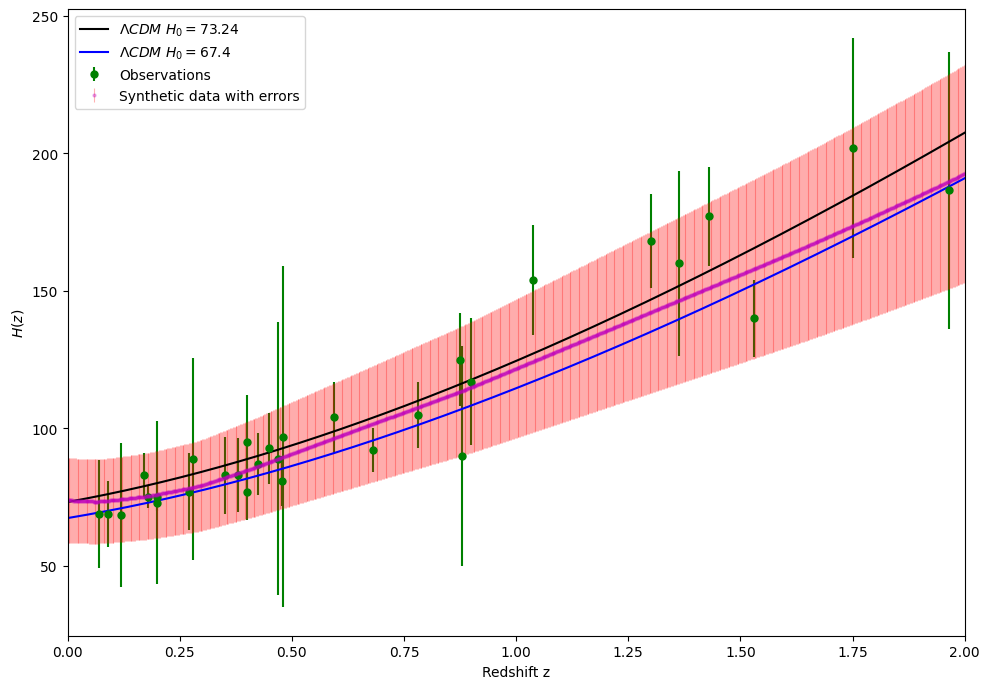

In [46]:
plt.figure(figsize=(10, 7), dpi=100)

zmodel = np.linspace(0, 2, 1000)
# plt.errorbar(zor, yor[:,0], yor[:,1], fmt='g.', markersize=10, label='Observations')
# plt.errorbar(rr, predy[:,0], predy[:,1], fmt='r.', markersize=4., label='Synthetic data with errors', alpha=0.01)
plt.errorbar(zor, y[:,0], y[:,1], fmt='g.', markersize=10, label='Observations')

plt.errorbar(rr, pred_random[:,0], pred_random[:,1], markersize=2., fmt='o', 
             ecolor='r', capthick=2, elinewidth=0.8, alpha=0.3, c='m',
             label='Synthetic data with errors')

plt.plot(zmodel, Hlcdm(zmodel), label='$\Lambda CDM$ $H_0 = 73.24$', c='k')
plt.plot(zmodel, Hlcdm(zmodel, H0=67.4), label='$\Lambda CDM$ $H_0 = 67.4$', c='b')
plt.xlabel("Redshift z")
plt.ylabel("$H(z)$")
plt.xlim(0, 2)
plt.tight_layout()
plt.legend(loc='upper left')

# plt.savefig("SyntheticHDrelu2.png",dpi=800)

In [25]:
pred_random.shape, r.shape

((1000, 2), (1000, 1))

In [26]:
# randomselection = np.random.randint(0,1000,50)
# randomselection = np.random.randint(0,1000,100)

# rr_reduced = rr[randomselection,:]
# predy_reduced = predy[randomselection,:]

# predy_reduced = pred_random[randomselection,:]
rr_reduced = rr
predy_reduced = pred_random

In [27]:
mookHz = np.concatenate((rr_reduced.reshape(-1,1), predy_reduced), axis=1)


# np.savetxt("autoEncoderHz50.dat",mookHz, delimiter=" ")

In [28]:
predy_reduced[:,1]

array([15.40113  , 15.396081 , 15.391032 , 15.38598  , 15.380934 ,
       15.375885 , 15.3708315, 15.365832 , 15.360986 , 15.356135 ,
       15.3512945, 15.34645  , 15.341604 , 15.336757 , 15.331911 ,
       15.327065 , 15.322217 , 15.318546 , 15.315143 , 15.311739 ,
       15.308339 , 15.304931 , 15.302129 , 15.300185 , 15.298246 ,
       15.296342 , 15.294579 , 15.292817 , 15.291057 , 15.289292 ,
       15.287528 , 15.285764 , 15.284308 , 15.284136 , 15.285287 ,
       15.290484 , 15.296791 , 15.303095 , 15.3094015, 15.315709 ,
       15.322014 , 15.3283205, 15.334626 , 15.340935 , 15.347241 ,
       15.353549 , 15.359855 , 15.366164 , 15.37247  , 15.3787775,
       15.385083 , 15.391389 , 15.397697 , 15.404025 , 15.411944 ,
       15.419866 , 15.427785 , 15.435702 , 15.443622 , 15.451541 ,
       15.459458 , 15.467379 , 15.475295 , 15.483213 , 15.491137 ,
       15.499055 , 15.506972 , 15.51489  , 15.522811 , 15.530728 ,
       15.538649 , 15.546568 , 15.554484 , 15.562402 , 15.5703

In [29]:
error  = predy_reduced[:,1]**2
error

array([ 237.1948 ,  237.0393 ,  236.88387,  236.72836,  236.57312,
        236.41785,  236.26247,  236.10881,  235.95988,  235.8109 ,
        235.66225,  235.51352,  235.36482,  235.21611,  235.0675 ,
        234.91893,  234.77034,  234.65787,  234.55359,  234.44936,
        234.34525,  234.2409 ,  234.15515,  234.09567,  234.03635,
        233.97807,  233.92413,  233.87025,  233.8164 ,  233.76247,
        233.70851,  233.65457,  233.61008,  233.60481,  233.64   ,
        233.79892,  233.99182,  234.18471,  234.37778,  234.57094,
        234.76411,  234.95741,  235.15076,  235.34428,  235.53781,
        235.73146,  235.92514,  236.119  ,  236.31284,  236.50679,
        236.70079,  236.89485,  237.08908,  237.28398,  237.52803,
        237.77226,  238.01654,  238.26091,  238.50545,  238.75012,
        238.99486,  239.2398 ,  239.48476,  239.7299 ,  239.97531,
        240.2207 ,  240.46619,  240.7118 ,  240.95766,  241.20352,
        241.4496 ,  241.69577,  241.94199,  242.18835,  242.43

In [30]:
diagcov = np.diag(error) #inverso
# np.savetxt("autoEncoderHz_cov50.dat", diagcov, delimiter= " ", header="#50 50")
np.shape(diagcov)

(1000, 1000)

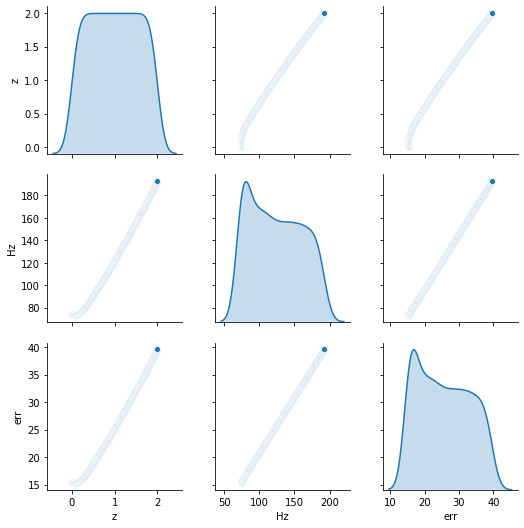

In [31]:
dfMook = pd.DataFrame(mookHz, columns=['z', 'Hz', 'err'])
sns.pairplot(dfMook, diag_kind="kde")
# plt.savefig("50hdmook.png")

In [45]:
# plt.plot(model_train.history['loss'], color='r')
# plt.plot(model_train.history['val_loss'], color='g')
# plt.xlim(1)
# plt.xscale('log')
# plt.ylabel('MSE')
# # plt.yscale('log')
# plt.xlabel('Epoch')
# plt.legend(['train', 'val'], loc='upper right')
# # plt.savefig("loss_hz.png", dpi=200)
# # plt.savefig("epochs_for_Hz.png", dpi=200)

In [33]:
def model2(input_z):
    x = Dense(50, activation='relu', input_shape=(1,))(input_z)
    x = Dense(200, activation='relu')(x)
    x = Dense(150, activation='relu')(x)
    x = Dense(2, activation='linear')(x)


    return elast


input_z = Input(shape = (1,))
neural_model2 = Model(input_z, model(input_z))
neural_model2.compile(loss='mean_squared_error', optimizer = "adam")
neural_model2.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense_4 (Dense)              (None, 50)                100       
_________________________________________________________________
dense_5 (Dense)              (None, 200)               10200     
_________________________________________________________________
dense_6 (Dense)              (None, 150)               30150     
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 302       
Total params: 40,752
Trainable params: 40,752
Non-trainable params: 0
_________________________________________________________________


#### Now, we not use the statistical error and only use a ANN to given redshift predict $H(z)$. And we estimates its uncertainty with dropout layers.

In [34]:
yy = y[:,0].reshape(-1,1)
zz = z
split = 0.8
ntrain = int(split * len(zz))
indx = [ntrain]
zz_train, zz_test = np.split(zz, indx)
yy_train, yy_test = np.split(yy, indx)
np.shape(zz_train), np.shape(yy_train), np.shape(zz_test), np.shape(yy_test)

((24, 1), (24, 1), (7, 1), (7, 1))

In [35]:
from astroNN.nn.layers import MCDropout

In [36]:
def model_regression_dropout(num_hidden):
    # Defeine Keras model for regression
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.InputLayer(batch_input_shape=((None, 1))))
    model.add(Dense(units=num_hidden[0], 
#                     kernel_regularizer=tf.keras.regularizers.l2(1e-4),
#                     kernel_initializer='he_normal', 
                    activation='relu'))
    model.add(MCDropout(0.3))
    model.add(Dense(units=num_hidden[1], 
#                     kernel_regularizer=tf.keras.regularizers.l2(1e-4),
#                     kernel_initializer='he_normal', 
                    activation='relu'))
    model.add(MCDropout(0.3))
    model.add(Dense(units=num_hidden[2], 
#                     kernel_regularizer=tf.keras.regularizers.l2(1e-4),
#                     kernel_initializer='he_normal', 
                    activation='relu'))
    model.add(MCDropout(0.3))
    model.add(Dense(units=2, activation="linear"))
    return model

#Define some parameter
batch_size = 4
# optimizer = Adam(lr=.005)
optimizer = Adam(lr=0.0001)


# Compile Keras model
model = model_regression_dropout(num_hidden=[50, 200, 150])
model.compile(loss='mse', optimizer=optimizer) 
# model2_train = model.fit(zz_train, yy_train, 
# #                          validation_split=0.0, 
#                          batch_size=batch_size, epochs=1000, verbose=1,
#                          validation_data=(zz_test, yy_test))    
model2_train = model.fit(z_train, y_train, batch_size=batch_size,
                                    epochs=800,verbose=1,
                                    validation_data=(z_test, y_test))

Epoch 1/800
6/6 [==============================] - 0s 14ms/step - loss: 5357.4414 - val_loss: 11005.8818
Epoch 2/800
6/6 [==============================] - 0s 2ms/step - loss: 5359.0493 - val_loss: 11007.8916
Epoch 3/800
6/6 [==============================] - 0s 2ms/step - loss: 5355.0083 - val_loss: 10999.8174
Epoch 4/800
6/6 [==============================] - 0s 2ms/step - loss: 5353.2612 - val_loss: 10996.1318
Epoch 5/800
6/6 [==============================] - 0s 2ms/step - loss: 5350.8560 - val_loss: 10993.2168
Epoch 6/800
6/6 [==============================] - 0s 3ms/step - loss: 5344.2104 - val_loss: 10971.3740
Epoch 7/800
6/6 [==============================] - 0s 3ms/step - loss: 5343.4727 - val_loss: 10976.3350
Epoch 8/800
6/6 [==============================] - 0s 2ms/step - loss: 5342.0317 - val_loss: 10974.7920
Epoch 9/800
6/6 [==============================] - 0s 2ms/step - loss: 5338.9448 - val_loss: 10966.7217
Epoch 10/800
6/6 [==============================] - 0s 2ms/step

6/6 [==============================] - 0s 3ms/step - loss: 2366.9824 - val_loss: 6792.2588
Epoch 80/800
6/6 [==============================] - 0s 3ms/step - loss: 2289.5061 - val_loss: 6717.5771
Epoch 81/800
6/6 [==============================] - 0s 3ms/step - loss: 2176.0659 - val_loss: 6757.3906
Epoch 82/800
6/6 [==============================] - 0s 3ms/step - loss: 2058.2708 - val_loss: 6135.8818
Epoch 83/800
6/6 [==============================] - 0s 3ms/step - loss: 2010.5474 - val_loss: 6779.1216
Epoch 84/800
6/6 [==============================] - 0s 2ms/step - loss: 1931.9698 - val_loss: 6217.2964
Epoch 85/800
6/6 [==============================] - 0s 3ms/step - loss: 1969.3873 - val_loss: 6160.2178
Epoch 86/800
6/6 [==============================] - 0s 3ms/step - loss: 1871.3702 - val_loss: 6498.7847
Epoch 87/800
6/6 [==============================] - 0s 3ms/step - loss: 1729.1371 - val_loss: 5623.2900
Epoch 88/800
6/6 [==============================] - 0s 2ms/step - loss: 1734.

Epoch 158/800
6/6 [==============================] - 0s 2ms/step - loss: 302.1203 - val_loss: 880.0025
Epoch 159/800
6/6 [==============================] - 0s 2ms/step - loss: 482.6909 - val_loss: 788.2086
Epoch 160/800
6/6 [==============================] - 0s 2ms/step - loss: 329.9275 - val_loss: 721.6118
Epoch 161/800
6/6 [==============================] - 0s 3ms/step - loss: 552.0486 - val_loss: 1148.4493
Epoch 162/800
6/6 [==============================] - 0s 2ms/step - loss: 355.8509 - val_loss: 886.9114
Epoch 163/800
6/6 [==============================] - 0s 2ms/step - loss: 386.2236 - val_loss: 1080.3749
Epoch 164/800
6/6 [==============================] - 0s 3ms/step - loss: 535.7207 - val_loss: 1687.1808
Epoch 165/800
6/6 [==============================] - 0s 3ms/step - loss: 392.0416 - val_loss: 847.9072
Epoch 166/800
6/6 [==============================] - 0s 3ms/step - loss: 369.4191 - val_loss: 1069.4780
Epoch 167/800
6/6 [==============================] - 0s 3ms/step - lo

6/6 [==============================] - 0s 3ms/step - loss: 231.9405 - val_loss: 622.0939
Epoch 238/800
6/6 [==============================] - 0s 3ms/step - loss: 345.6217 - val_loss: 985.7997
Epoch 239/800
6/6 [==============================] - 0s 2ms/step - loss: 227.6270 - val_loss: 448.8257
Epoch 240/800
6/6 [==============================] - 0s 2ms/step - loss: 304.6067 - val_loss: 760.1081
Epoch 241/800
6/6 [==============================] - 0s 2ms/step - loss: 274.3055 - val_loss: 697.8507
Epoch 242/800
6/6 [==============================] - 0s 2ms/step - loss: 389.2004 - val_loss: 355.8213
Epoch 243/800
6/6 [==============================] - 0s 2ms/step - loss: 258.7944 - val_loss: 576.9693
Epoch 244/800
6/6 [==============================] - 0s 2ms/step - loss: 306.4237 - val_loss: 491.9986
Epoch 245/800
6/6 [==============================] - 0s 2ms/step - loss: 213.7617 - val_loss: 478.4858
Epoch 246/800
6/6 [==============================] - 0s 3ms/step - loss: 304.9476 - val

6/6 [==============================] - 0s 3ms/step - loss: 255.3969 - val_loss: 395.6924
Epoch 317/800
6/6 [==============================] - 0s 3ms/step - loss: 301.9123 - val_loss: 474.0058
Epoch 318/800
6/6 [==============================] - 0s 3ms/step - loss: 169.6846 - val_loss: 880.2695
Epoch 319/800
6/6 [==============================] - 0s 2ms/step - loss: 363.5051 - val_loss: 740.7950
Epoch 320/800
6/6 [==============================] - 0s 2ms/step - loss: 265.8217 - val_loss: 502.8332
Epoch 321/800
6/6 [==============================] - 0s 2ms/step - loss: 216.3846 - val_loss: 627.3036
Epoch 322/800
6/6 [==============================] - 0s 3ms/step - loss: 230.9571 - val_loss: 505.6476
Epoch 323/800
6/6 [==============================] - 0s 2ms/step - loss: 272.1687 - val_loss: 637.3794
Epoch 324/800
6/6 [==============================] - 0s 3ms/step - loss: 246.6256 - val_loss: 692.7614
Epoch 325/800
6/6 [==============================] - 0s 2ms/step - loss: 265.7508 - val

6/6 [==============================] - 0s 2ms/step - loss: 345.6556 - val_loss: 606.6063
Epoch 396/800
6/6 [==============================] - 0s 2ms/step - loss: 223.6607 - val_loss: 808.9593
Epoch 397/800
6/6 [==============================] - 0s 2ms/step - loss: 274.4110 - val_loss: 858.6653
Epoch 398/800
6/6 [==============================] - 0s 3ms/step - loss: 421.5174 - val_loss: 705.1772
Epoch 399/800
6/6 [==============================] - 0s 2ms/step - loss: 304.6577 - val_loss: 785.3344
Epoch 400/800
6/6 [==============================] - 0s 2ms/step - loss: 263.7469 - val_loss: 634.1069
Epoch 401/800
6/6 [==============================] - 0s 2ms/step - loss: 211.4352 - val_loss: 348.9857
Epoch 402/800
6/6 [==============================] - 0s 2ms/step - loss: 188.3298 - val_loss: 665.1323
Epoch 403/800
6/6 [==============================] - 0s 2ms/step - loss: 223.1815 - val_loss: 652.7701
Epoch 404/800
6/6 [==============================] - 0s 2ms/step - loss: 255.6380 - val

6/6 [==============================] - 0s 3ms/step - loss: 243.2645 - val_loss: 715.9418
Epoch 475/800
6/6 [==============================] - 0s 2ms/step - loss: 197.8390 - val_loss: 766.2042
Epoch 476/800
6/6 [==============================] - 0s 3ms/step - loss: 179.4802 - val_loss: 379.5765
Epoch 477/800
6/6 [==============================] - 0s 3ms/step - loss: 212.8251 - val_loss: 490.1970
Epoch 478/800
6/6 [==============================] - 0s 2ms/step - loss: 328.7682 - val_loss: 465.0897
Epoch 479/800
6/6 [==============================] - 0s 2ms/step - loss: 269.4044 - val_loss: 497.3151
Epoch 480/800
6/6 [==============================] - 0s 2ms/step - loss: 188.9865 - val_loss: 351.0212
Epoch 481/800
6/6 [==============================] - 0s 2ms/step - loss: 192.7655 - val_loss: 364.4360
Epoch 482/800
6/6 [==============================] - 0s 2ms/step - loss: 246.9492 - val_loss: 723.5764
Epoch 483/800
6/6 [==============================] - 0s 3ms/step - loss: 208.5538 - val

6/6 [==============================] - 0s 3ms/step - loss: 198.1937 - val_loss: 941.2882
Epoch 554/800
6/6 [==============================] - 0s 2ms/step - loss: 263.2157 - val_loss: 619.2330
Epoch 555/800
6/6 [==============================] - 0s 2ms/step - loss: 227.0054 - val_loss: 433.3992
Epoch 556/800
6/6 [==============================] - 0s 3ms/step - loss: 190.8315 - val_loss: 587.1825
Epoch 557/800
6/6 [==============================] - 0s 2ms/step - loss: 206.7985 - val_loss: 381.2665
Epoch 558/800
6/6 [==============================] - 0s 3ms/step - loss: 227.5103 - val_loss: 247.0596
Epoch 559/800
6/6 [==============================] - 0s 2ms/step - loss: 179.0440 - val_loss: 727.2689
Epoch 560/800
6/6 [==============================] - 0s 3ms/step - loss: 195.4187 - val_loss: 613.7437
Epoch 561/800
6/6 [==============================] - 0s 3ms/step - loss: 305.4089 - val_loss: 732.2744
Epoch 562/800
6/6 [==============================] - 0s 2ms/step - loss: 190.0252 - val

6/6 [==============================] - 0s 2ms/step - loss: 210.5040 - val_loss: 248.5095
Epoch 633/800
6/6 [==============================] - 0s 3ms/step - loss: 242.8280 - val_loss: 484.6836
Epoch 634/800
6/6 [==============================] - 0s 3ms/step - loss: 305.5400 - val_loss: 651.4442
Epoch 635/800
6/6 [==============================] - 0s 2ms/step - loss: 271.1135 - val_loss: 533.4728
Epoch 636/800
6/6 [==============================] - 0s 3ms/step - loss: 268.5938 - val_loss: 708.8387
Epoch 637/800
6/6 [==============================] - 0s 3ms/step - loss: 134.7488 - val_loss: 655.1074
Epoch 638/800
6/6 [==============================] - 0s 2ms/step - loss: 220.9632 - val_loss: 657.0700
Epoch 639/800
6/6 [==============================] - 0s 3ms/step - loss: 230.8258 - val_loss: 496.2449
Epoch 640/800
6/6 [==============================] - 0s 3ms/step - loss: 140.5211 - val_loss: 452.2310
Epoch 641/800
6/6 [==============================] - 0s 2ms/step - loss: 280.5027 - val

6/6 [==============================] - 0s 3ms/step - loss: 213.7317 - val_loss: 594.7525
Epoch 712/800
6/6 [==============================] - 0s 2ms/step - loss: 329.0036 - val_loss: 328.3346
Epoch 713/800
6/6 [==============================] - 0s 3ms/step - loss: 221.2155 - val_loss: 750.1818
Epoch 714/800
6/6 [==============================] - 0s 2ms/step - loss: 203.5288 - val_loss: 684.3907
Epoch 715/800
6/6 [==============================] - 0s 2ms/step - loss: 197.8786 - val_loss: 551.9437
Epoch 716/800
6/6 [==============================] - 0s 2ms/step - loss: 230.4364 - val_loss: 377.7020
Epoch 717/800
6/6 [==============================] - 0s 2ms/step - loss: 215.6574 - val_loss: 605.3043
Epoch 718/800
6/6 [==============================] - 0s 2ms/step - loss: 178.6627 - val_loss: 672.1260
Epoch 719/800
6/6 [==============================] - 0s 2ms/step - loss: 173.8551 - val_loss: 507.4180
Epoch 720/800
6/6 [==============================] - 0s 2ms/step - loss: 264.0910 - val

6/6 [==============================] - 0s 2ms/step - loss: 143.0227 - val_loss: 478.2500
Epoch 791/800
6/6 [==============================] - 0s 2ms/step - loss: 238.9435 - val_loss: 585.5523
Epoch 792/800
6/6 [==============================] - 0s 3ms/step - loss: 263.8609 - val_loss: 510.1703
Epoch 793/800
6/6 [==============================] - 0s 3ms/step - loss: 220.9614 - val_loss: 437.5451
Epoch 794/800
6/6 [==============================] - 0s 2ms/step - loss: 149.0622 - val_loss: 348.2903
Epoch 795/800
6/6 [==============================] - 0s 2ms/step - loss: 209.0604 - val_loss: 546.6536
Epoch 796/800
6/6 [==============================] - 0s 2ms/step - loss: 265.9276 - val_loss: 261.1518
Epoch 797/800
6/6 [==============================] - 0s 3ms/step - loss: 209.9215 - val_loss: 517.8341
Epoch 798/800
6/6 [==============================] - 0s 3ms/step - loss: 187.4260 - val_loss: 527.2155
Epoch 799/800
6/6 [==============================] - 0s 2ms/step - loss: 177.5220 - val

In [37]:
# Generate test data
test_batch_size = 1000
# x_test = np.random.uniform(0, 2., test_batch_size)
x_test = np.linspace(0, 2., test_batch_size)

mc_dropout_num = 100  # Run Dropout 100 times
predictions = np.zeros((mc_dropout_num, test_batch_size, 2))
uncertainty = np.zeros((mc_dropout_num, test_batch_size, 1))
for i in range(mc_dropout_num):
    predictions[i] = model.predict(scalerz.transform(x_test.reshape(-1,1)))
    
# get mean results and its varience
prediction_mc_dropout = np.mean(predictions, axis=0)
std_mc_dropout = np.std(predictions, axis=0)

In [38]:
np.mean(std_mc_dropout[:,0]), np.mean(std_mc_dropout[:,1])

(15.81667384054732, 5.509586785748641)

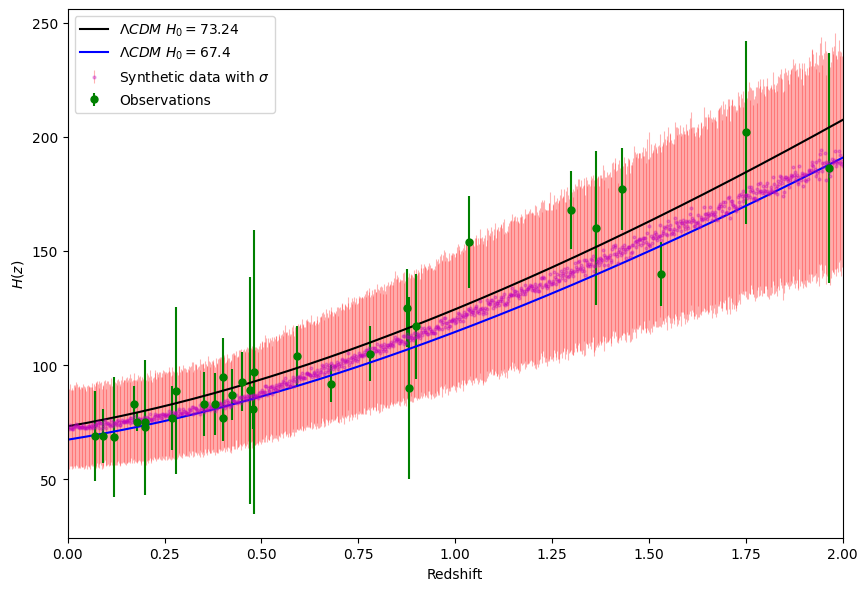

In [39]:
# Plotting
plt.figure(figsize=(10, 7), dpi=100)
# plt.figure(figsize=(5, 4), dpi=100)
sigma = np.sqrt(std_mc_dropout[:, 0]**2 + std_mc_dropout[:, 1]**2+ prediction_mc_dropout[:,1]**2)
plt.errorbar(x_test, prediction_mc_dropout[:,0], yerr=sigma, markersize=2, fmt='o', 
             ecolor='r', capthick=2, elinewidth=0.8, alpha=0.3, c='m',
             label='Synthetic data with $\sigma$')

# plt.scatter(scalerz.inverse_transform(zz), yy, color='k', label='Original cosmic chronometers')
plt.errorbar(zor, y[:,0], y[:,1], fmt='g.', markersize=10, label='Observations')
plt.plot(zmodel, Hlcdm(zmodel), label='$\Lambda CDM$ $H_0 = 73.24$', c='k')
plt.plot(zmodel, Hlcdm(zmodel, H0=67.4), label='$\Lambda CDM$ $H_0 = 67.4$', c='b')
plt.xlim(0,2)
plt.xlabel('Redshift')
plt.ylabel('$H(z)$')
# plt.legend(loc='best')
plt.legend(loc='upper left')
# plt.show()
plt.savefig('Hz_dropout800.png', dpi=100)

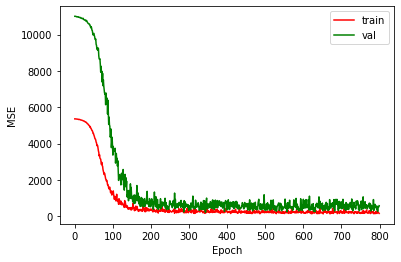

In [40]:
plt.plot(model2_train.history['loss'], color='r')
plt.plot(model2_train.history['val_loss'], color='g')
plt.ylabel('MSE')
plt.xlabel('Epoch')
# plt.xscale('log')
plt.legend(['train', 'val'], loc='upper right')
plt.savefig('lossHzdropout10mil.png', dpi=100)

In [44]:
model.save('FFNN+MC-DO_Hz.h5')

In [41]:
mookdpHz = np.concatenate((x_test.reshape(-1,1), prediction_mc_dropout), axis=1)

# np.savetxt("autoEncoderHz50dropout.dat",mookdpHz, delimiter=" ")

In [42]:
diagcov2 = np.diag(sigma**2) #inverso
# np.savetxt("autoEncoderHz_cov50dropout.dat", diagcov2, delimiter= " ", header="#50 50")

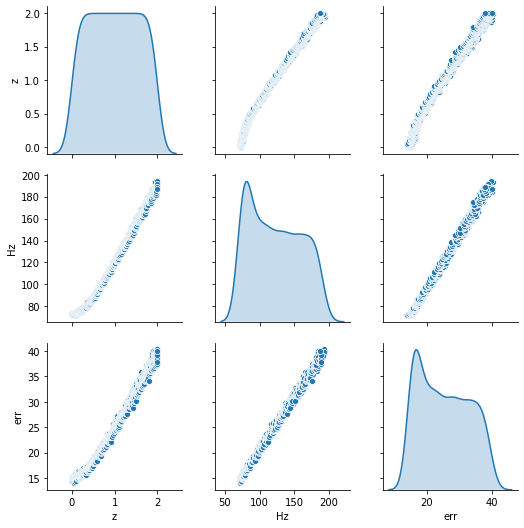

In [43]:
dfMook = pd.DataFrame(mookdpHz, columns=['z', 'Hz', 'err'])
sns.pairplot(dfMook, diag_kind="kde")
# plt.savefig("50hdmookdropout.png")